In [1]:
import matplotlib.pylab as plt

import cv2
import numpy as np
import imutils

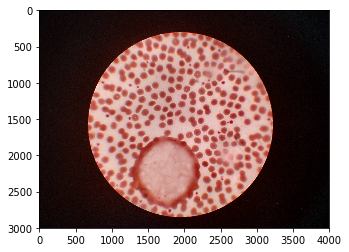

In [2]:
image = cv2.imread('0005.png')
plt.imshow(image)

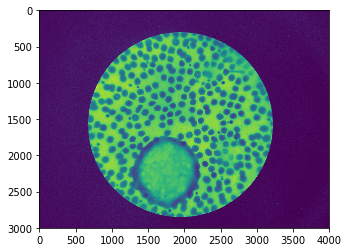

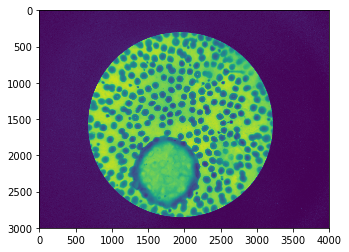

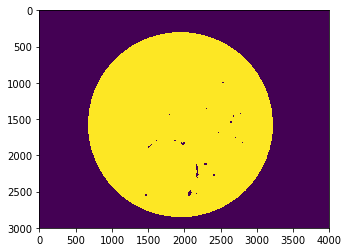

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayGB = cv2.GaussianBlur(gray, (5, 5), 0)
ret,thresh = cv2.threshold(grayGB, 45, 255, cv2.THRESH_BINARY)

plt.imshow(gray)
plt.show()
plt.imshow(grayGB)
plt.show()
plt.imshow(thresh)

In [4]:
type(grayGB)

numpy.ndarray

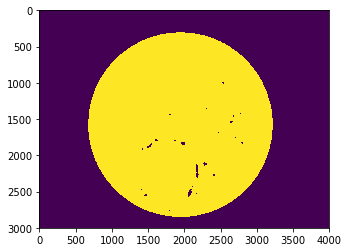

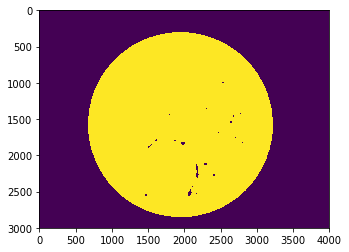

In [5]:
thresh_erode = cv2.erode(thresh, None, iterations=2)
thresh_dilate = cv2.dilate(thresh_erode, None, iterations=2)

plt.imshow(thresh_erode)
plt.show()
plt.imshow(thresh_dilate)

In [6]:
cnts = cv2.findContours(thresh_dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [7]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

print(extLeft,extRight,extTop,extBot)

(676, 1558) (3225, 1629) (1940, 303) (1995, 2849)


In [8]:
draw = cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 3, (0, 0, 255), -1)
cv2.circle(image, extRight, 3, (0, 255, 0), -1)
cv2.circle(image, extTop, 3, (255, 0, 0), -1)
cv2.circle(image, extBot, 3, (255, 255, 0), -1)

array([[[11,  9,  9],
        [11,  9,  9],
        [ 9,  7,  7],
        ...,
        [ 2,  2,  2],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[11,  9,  9],
        [10,  8,  8],
        [ 9,  7,  7],
        ...,
        [ 1,  1,  1],
        [ 4,  4,  4],
        [ 6,  6,  6]],

       [[11,  9,  9],
        [10,  8,  8],
        [11,  9,  9],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[ 6,  4,  4],
        [ 6,  4,  4],
        [ 6,  4,  4],
        ...,
        [ 2,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0]],

       [[ 5,  3,  3],
        [ 6,  4,  4],
        [ 6,  4,  4],
        ...,
        [ 2,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0]],

       [[ 4,  2,  2],
        [ 5,  3,  3],
        [ 6,  4,  4],
        ...,
        [ 3,  1,  1],
        [ 2,  0,  0],
        [ 2,  0,  0]]], dtype=uint8)

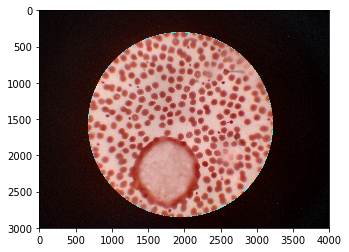

In [9]:
plt.imshow(draw)

In [10]:
bounds_t = int(extTop[0])-1
bounds_b = int(extBot[0])+1
bounds_l = int(extLeft[1])-1
bounds_r = int(extRight[1])+1

print(bounds_t,bounds_b,bounds_l,bounds_r)

1939 1996 1557 1630


In [11]:
max_width = max(bounds_l,bounds_r)
max(bounds_l,bounds_r)

1630

In [12]:
max_height = max(bounds_t,bounds_b)
max(bounds_t,bounds_b)

1996

In [13]:
import math

In [14]:
width = round(math.sqrt((extRight[0]-extLeft[0])**2 + (extRight[1]-extLeft[1])**2))+1
height = round(math.sqrt((extBot[0]-extTop[0])**2 + (extBot[1]-extTop[1])**2))+1

diameter = max(width,height)
radius = int(diameter / 2)

radius

1275

TypeError: Required argument 'mat' (pos 2) not found

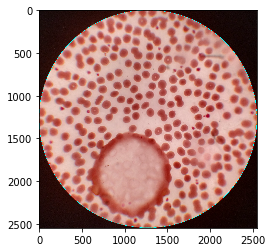

In [15]:
x_center = int(extLeft[0] + radius)
y_center = int(extTop[1] + radius)
mask = cv2.getRectSubPix(image, (width,height), (x_center,y_center), 3)

plt.imshow(mask)
cv2.imshow(mask)

mask.shape,x_center,y_center

In [ ]:
x_c = int(width / 2)
y_c = int(height / 2)
#ig = cv2.drawContours(mask, (x_c,y_c), radius, (255, 255, 0), 3)

#plt.imshow(ig)
x_c,y_c

In [ ]:
maskGray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.imshow(maskGray)

In [ ]:
ret,img = cv2.threshold(maskGray, 45, 255, cv2.THRESH_OTSU)

plt.imshow(img)

In [ ]:
adaptive = cv2.adaptiveThreshold(img, 101, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,145,2)

plt.imshow(adaptive)

In [ ]:
if not(ig.all()):
    mask = cv2.bitwise_not(mask)

plt.imshow(mask)

In [ ]:
adaptive = cv2.adaptiveThreshold(img, 101, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,145,2)

plt.imshow(adaptive)